In [1]:
import pandas as pd
df = pd.read_excel('Employee Attrition Data 0227.xlsx')
x=df['EducationField']
len(df.columns)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,...,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,...,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [2]:
p1=df['NumCompaniesWorked'].isnull().sum()
p2=df['NumCompaniesWorked'].count()
perc1=(p1/p2)*100
perc1
p3=df['TotalWorkingYears'].isnull().sum()
p4=df['TotalWorkingYears'].count()
perc2=(p3/p4)*100
perc2.round(3)



0.204

In [3]:
#1 Age
lis=[]
clis=list(df.columns)
for i in clis:
    uper=(df[i].nunique()/df[i].count())*100
    lis.append(uper.round(2))
lis


[0.98,
 0.05,
 0.07,
 0.07,
 0.66,
 0.11,
 0.14,
 100.0,
 0.05,
 0.11,
 0.2,
 0.07,
 30.59,
 0.23,
 0.34,
 0.09,
 0.91,
 0.16,
 0.84,
 0.36,
 0.41]

In [4]:
df['Age'].count()

4410

In [5]:
#checking all the values in the age variable are integers or not and also that if there are any negative values.
x=0
for i in df['Age']:
    if i!=abs(i):  #also abs()
        print(False)
    else:
        x=x+1
        print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [7]:
df['Attrition'].replace([1,0], ['Yes', 'No'], inplace = True)
odf=df.dropna()
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,...,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,...,Divorced,23980,0.0,14,1,10.0,2,9,7,8


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,2207.804884,2.063898,65061.702419,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,7.000000,3.000000,2208.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
100%,60.000000,29.000000,5.000000,4409.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000
max,60.000000,29.000000,5.000000,4409.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


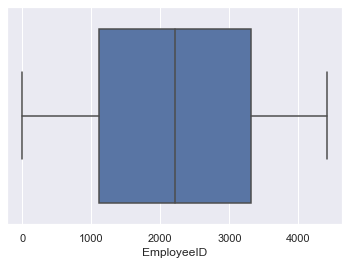

In [8]:
import seaborn as sns
import matplotlib as plt
sns.set_theme()
sns.boxplot(data=df,x='EmployeeID')
odf.describe(percentiles=[0,1])

29.0

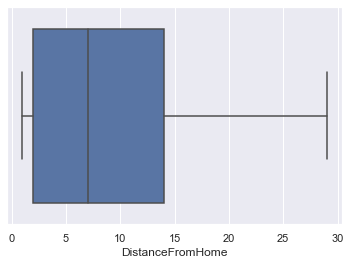

In [9]:
s1=df['DistanceFromHome'].quantile(1)
sns.boxplot(data=df,x='DistanceFromHome')
s1

In [10]:
odf.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single
...,...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,Other,Female,Human Resources,Single
4405,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single
4406,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced
4407,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married


Section 3 
plots for Categorical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

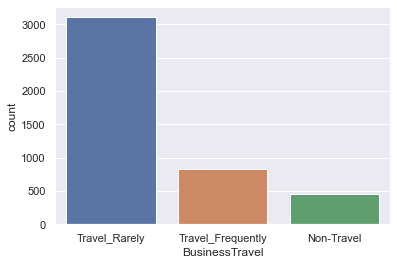

In [11]:
sns.countplot(odf['BusinessTravel'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

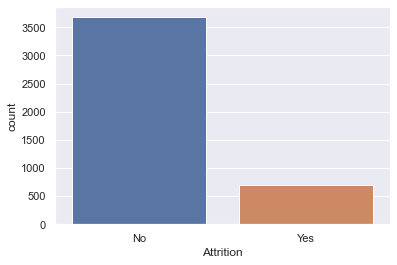

In [12]:
sns.countplot(odf['Attrition'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

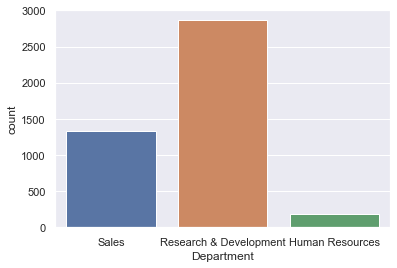

In [13]:
sns.countplot(odf['Department'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

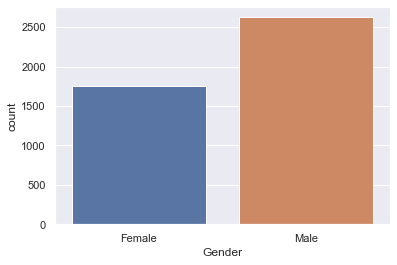

In [14]:
sns.countplot(odf['Gender'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

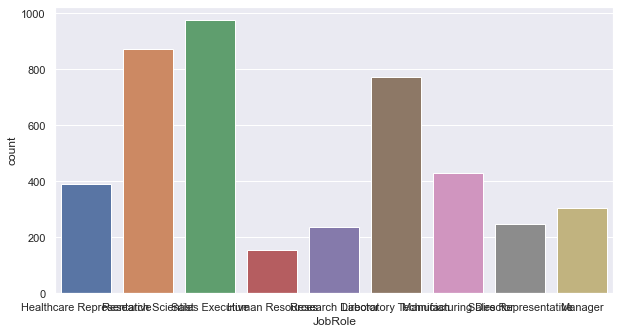

In [15]:
sns.set(rc={'figure.figsize':(10,5.27)})
sns.countplot(data=odf,x='JobRole')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

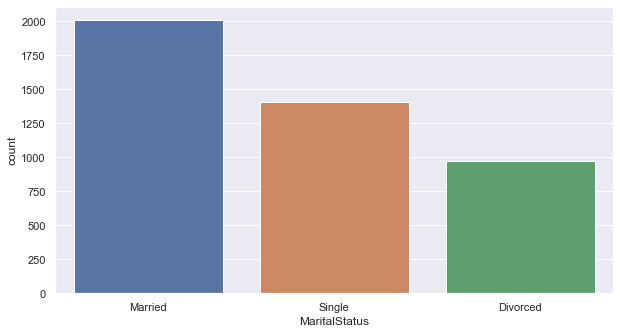

In [16]:
sns.countplot(odf['MaritalStatus'])

 Scatter plots for relevant Numerical Variables 

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

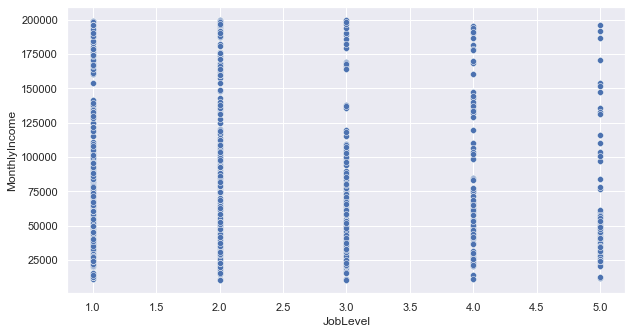

In [17]:
sns.scatterplot(x=odf['JobLevel'],y=odf['MonthlyIncome'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

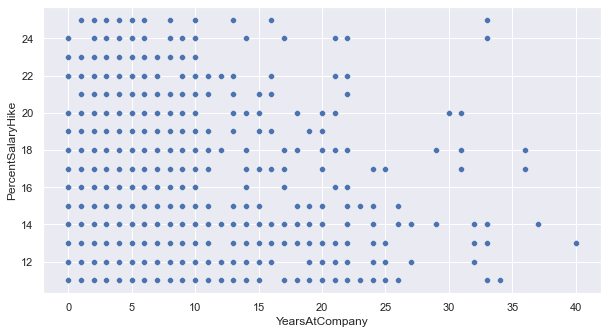

In [18]:
sns.scatterplot(x=odf['YearsAtCompany'],y=odf['PercentSalaryHike'])

<AxesSubplot:xlabel='JobLevel', ylabel='YearsAtCompany'>

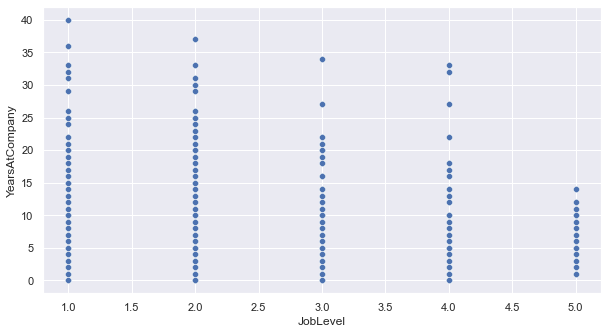

In [19]:
sns.scatterplot(x=odf['JobLevel'],y=odf['YearsAtCompany'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='StockOptionLevel'>

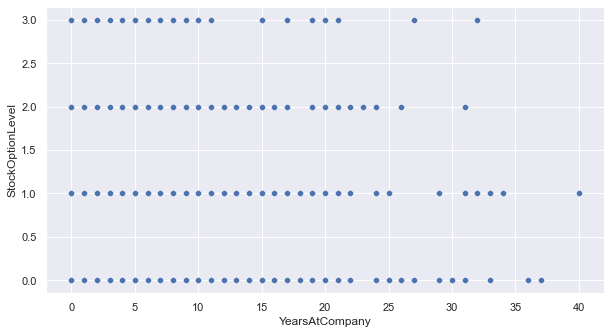

In [20]:
sns.scatterplot(x=odf['YearsAtCompany'],y=odf['StockOptionLevel'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='YearsAtCompany'>

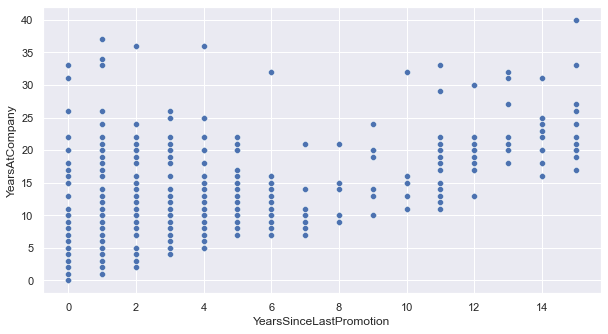

In [21]:
sns.scatterplot(x=odf['YearsSinceLastPromotion'],y=odf['YearsAtCompany'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

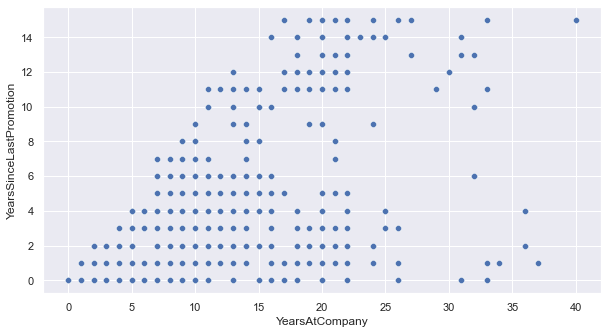

In [22]:
sns.scatterplot(x=odf['YearsAtCompany'],y=odf['YearsSinceLastPromotion'])

Cross-tabulation for relevant categorical variables

In [23]:
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single
...,...,...,...,...,...,...,...
4405,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single
4406,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced
4407,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
4408,No,Travel_Rarely,Sales,Medical,Male,Laboratory Technician,Divorced


In [24]:
pd.crosstab(df['JobRole'],df['Attrition'],normalize=True).round(3)

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.076,0.013
Human Resources,0.031,0.005
Laboratory Technician,0.148,0.029
Manager,0.060,0.010
Manufacturing Director,0.088,0.011
Research Director,0.041,0.013
Research Scientist,0.163,0.036
Sales Executive,0.184,0.037
Sales Representative,0.048,0.008


In [25]:
pd.crosstab(df['Department'],df['Attrition'],normalize=True).round(3)

Attrition,No,Yes
Department,,
Human Resources,0.030,0.013
Research & Development,0.551,0.103
Sales,0.258,0.046


In [26]:
pd.crosstab(df['Gender'],df['Attrition'],normalize=True).round(3)

Attrition,No,Yes
Gender,,
Female,0.339,0.061
Male,0.500,0.100


In [27]:
pd.crosstab(df['Department'],df['Gender'],normalize=True).round(3)

Gender,Female,Male
Department,,
Human Resources,0.016,0.027
Research & Development,0.264,0.390
Sales,0.120,0.184


In [28]:
pd.crosstab(df['JobRole'],df['Gender'],normalize=True).round(3)

Gender,Female,Male
JobRole,,
Healthcare Representative,0.036,0.053
Human Resources,0.014,0.022
Laboratory Technician,0.068,0.108
Manager,0.033,0.036
Manufacturing Director,0.040,0.059
Research Director,0.022,0.033
Research Scientist,0.073,0.125
Sales Executive,0.090,0.132
Sales Representative,0.024,0.033


In [29]:
odf['Education'].describe()

count    4382.000000
mean        2.912369
std         1.024728
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64